# Hyperparameter Tuning

This files tests different parameters for the Random Forest classifier, and assess where the validation data reaches a maximum without overfitting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
ethnic_group_names = ['unknown', 'white', 'other', 'asian', 'hispanic_latino', 'black_african_american',
                      'unable_to_obtain', 'american_indian_alaska_native']
path = './data/preprocessing_IV/'

def read_train_val_test(name, path):
    train = pd.read_csv(path + name + '_train.csv')
    # NOTE: drope datetime columns for now, because sklearn does not support it
    train = train.drop(columns=['admittime', 'edregtime', 'emar_charttime', 'lab_charttime'])
    validate = pd.read_csv(path + name + '_validate.csv')
    # NOTE: drope datetime columns for now, because sklearn does not support it
    validate = validate.drop(columns=['admittime', 'edregtime', 'emar_charttime', 'lab_charttime'])
    test = pd.read_csv(path + name + '_test.csv')
    # NOTE: drope datetime columns for now, because sklearn does not support it
    test = test.drop(columns=['admittime', 'edregtime', 'emar_charttime', 'lab_charttime'])
    return train, validate, test

In [3]:
# split features and labels
def splitFeaturesLabels(df):
    X = df.copy()
    X.drop('has_kidney_issue', axis=1)
    # X = df[['anchor_age', 'anchor_year']]
    return X, df.has_kidney_issue

In [4]:
def tune(name, train, val):
    # Initiate empty df to store results
    results = pd.DataFrame({"ethnicity": [], "max_depth":[], "n_estimators":[], "accuracy":[]})

    # split labels and features
    # X = df[['hadm_id', 'subject_id', 'admittime', 'anchor_age', 'anchor_year', 'icd_code_count', 'emar_count', 'lab_count']]
    # y = df['has_kidney_issue']

    X_train, y_train = splitFeaturesLabels(train)
    X_val, y_val = splitFeaturesLabels(val)

    # split train and test
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # try different values for max_depth of the individual trees
    for depth in [6, 8, 10, 12, 14, 16, 18, 20]:
        # try different values for the number of trees in a forest
        for estimator in [10, 50, 100, 150, 200, 250, 300]:
            # train classifier
            clf = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=42)
            clf.fit(X_train, y_train)
            # predict labels
            y_pred = clf.predict(X_val)
            # calculate accuracy
            accuracy = accuracy_score(y_val, y_pred)
            # append results to df
            new_result = pd.DataFrame({"ethnicity": name, "max_depth":depth, "n_estimators":estimator, "accuracy":accuracy}, index=[0])
            results = pd.concat([results, new_result])
    
    # reset indexing
    results = results.reset_index(drop=True)

    # return
    return results

In [8]:
def getBestParams(df, results):
    return df.append(results.loc[results['accuracy'].idxmax()])

def tuneEachEthnicity(groups):
    all_results = pd.DataFrame({"ethnicity": [], "max_depth":[], "n_estimators":[], "accuracy":[]})
    for ethnicity in groups:
        train, val, test = read_train_val_test(ethnicity, path)
        results = tune(ethnicity, train, val)
        all_results = getBestParams(all_results, results)
    return all_results

In [6]:
def runToCSV():
    results = tuneEachEthnicity(ethnic_group_names)
    results.to_csv('hyperparameters.csv', index=False)

runToCSV()

C:\Users\alexa\AppData\Local\Temp\ipykernel_6768\4201142009.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(results.loc[results['accuracy'].idxmax()])
C:\Users\alexa\AppData\Local\Temp\ipykernel_6768\4201142009.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(results.loc[results['accuracy'].idxmax()])
C:\Users\alexa\AppData\Local\Temp\ipykernel_6768\4201142009.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(results.loc[results['accuracy'].idxmax()])
C:\Users\alexa\AppData\Local\Temp\ipykernel_6768\4201142009.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append

In [10]:
def tuneOneEthnicity (ethnicity):
    train, val, test = read_train_val_test(ethnicity, path)
    results = tune(ethnicity, train, val)
    return results

Highest accuracy:
 ethnicity          white
max_depth           20.0
n_estimators       200.0
accuracy        0.857625
Name: 53, dtype: object


Text(0.5, 0, 'accuracy')

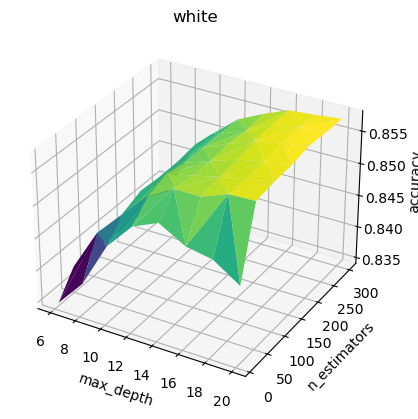

In [11]:
white = tune('white')
print("Highest accuracy:\n", white.loc[white['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(white["max_depth"], white["n_estimators"], white["accuracy"], cmap='viridis', edgecolor='none')
ax.set_title("white")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("accuracy")

Highest accuracy:
 ethnicity          other
max_depth           12.0
n_estimators        10.0
accuracy        0.875978
Name: 21, dtype: object


Text(0.5, 0, 'accuracy')

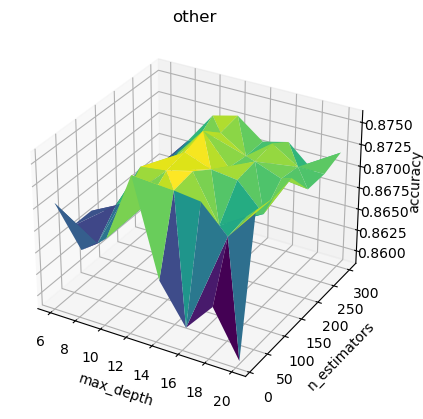

In [12]:
other = tune('other')
print("Highest accuracy:\n", other.loc[other['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(other["max_depth"], other["n_estimators"], other["accuracy"], cmap='viridis', edgecolor='none')

Highest accuracy:
 ethnicity          asian
max_depth           18.0
n_estimators       100.0
accuracy        0.902121
Name: 44, dtype: object


Text(0.5, 0, 'accuracy')

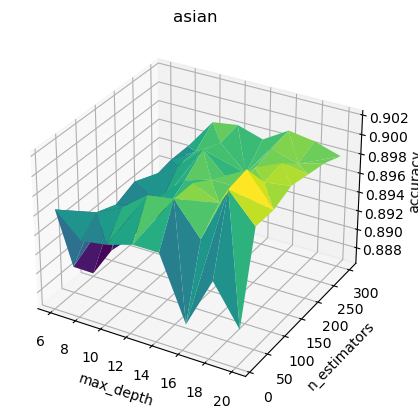

In [13]:
asian = tune('asian')
print("Highest accuracy:\n", asian.loc[asian['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(asian["max_depth"], asian["n_estimators"], asian["accuracy"], cmap='viridis', edgecolor='none')

Highest accuracy:
 ethnicity       hispanic_latino
max_depth                  20.0
n_estimators              300.0
accuracy               0.876506
Name: 55, dtype: object


Text(0.5, 0, 'accuracy')

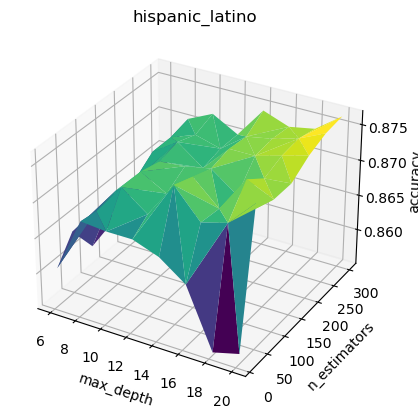

In [14]:
hispanic_latino = tune('hispanic_latino')
print("Highest accuracy:\n", hispanic_latino.loc[hispanic_latino['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(hispanic_latino["max_depth"], hispanic_latino["n_estimators"], hispanic_latino["accuracy"], cmap='viridis', edgecolor='none')

Highest accuracy:
 ethnicity       black_african_american
max_depth                         18.0
n_estimators                     100.0
accuracy                      0.852832
Name: 44, dtype: object


Text(0.5, 0, 'accuracy')

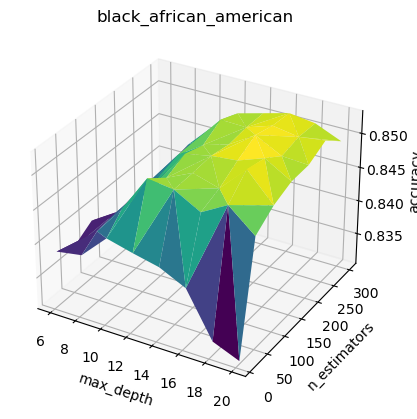

In [15]:
black_african_american = tuneOneEthnicity('black_african_american')
print("Highest accuracy:\n", black_african_american.loc[black_african_american['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(black_african_american["max_depth"], black_african_american["n_estimators"], black_african_american["accuracy"], cmap='viridis', edgecolor='none')
ax.set_title("black_african_american")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("accuracy")

Highest accuracy:
 ethnicity       unable_to_obtain
max_depth                    8.0
n_estimators                50.0
accuracy                0.935829
Name: 8, dtype: object


Text(0.5, 0, 'accuracy')

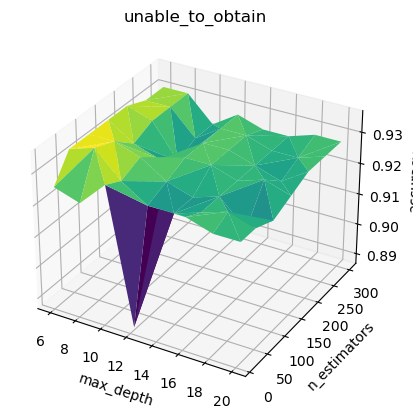

In [16]:
unable_to_obtain = tuneOneEthnicity('unable_to_obtain')
print("Highest accuracy:\n", unable_to_obtain.loc[unable_to_obtain['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(unable_to_obtain["max_depth"], unable_to_obtain["n_estimators"], unable_to_obtain["accuracy"], cmap='viridis', edgecolor='none')
ax.set_title("unable_to_obtain")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("accuracy")

Highest accuracy:
 ethnicity       american_indian_alaska_native
max_depth                                 8.0
n_estimators                             50.0
accuracy                             0.869281
Name: 8, dtype: object


Text(0.5, 0, 'accuracy')

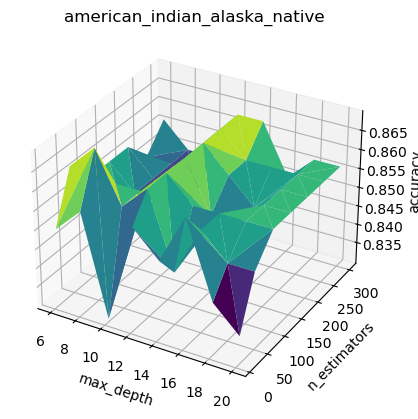

In [17]:
american_indian_alaska_native = tune('american_indian_alaska_native')
print("Highest accuracy:\n", american_indian_alaska_native.loc[american_indian_alaska_native['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(american_indian_alaska_native["max_depth"], american_indian_alaska_native["n_estimators"], american_indian_alaska_native["accuracy"], cmap='viridis', edgecolor='none')

Highest accuracy:
 ethnicity        unknown
max_depth           16.0
n_estimators       300.0
accuracy        0.895469
Name: 41, dtype: object


Text(0.5, 0, 'accuracy')

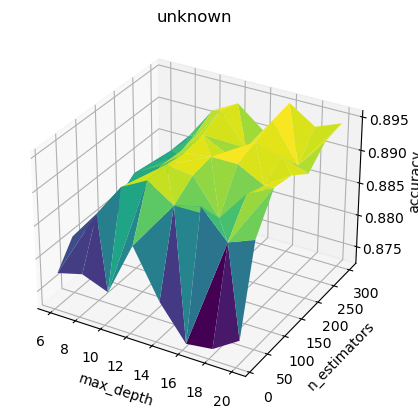

In [18]:
unknown = tuneOneEthnicity('unknown')
print("Highest accuracy:\n", unknown.loc[unknown['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(unknown["max_depth"], unknown["n_estimators"], unknown["accuracy"], cmap='viridis', edgecolor='none')
ax.set_title("unknown")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("accuracy")